<a href="https://colab.research.google.com/github/Hyuk-Jung-Newbie/individual-repoting_JH/blob/main/%EA%B0%9C%EC%9D%B8%EA%B3%BC%EC%A0%9C_%ED%95%9C%EC%8B%9D%EB%B6%84%EB%A5%98_%EC%A0%95%ED%98%81_v0_38_0827_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd/content/drive/MyDrive/KU_LGCNS21/K-FOOD

/content/drive/MyDrive/KU_LGCNS21/K-FOOD


In [3]:
pip install imageio

In [38]:
import tensorflow as tf
import numpy as np
from skimage import io
from skimage.transform import rescale,resize,downscale_local_mean
import cv2
import os
import PIL
from PIL import Image
import tensorflow_datasets as tfds
from google.colab.patches import cv2_imshow
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from google.colab import drive
from imageio import imread

In [5]:
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline  
print ("Package loaded") 
cwd = os.getcwd()
print ("Current folder is %s" % (cwd) )

Package loaded
Current folder is /content/drive/MyDrive/KU_LGCNS21/K-FOOD


In [6]:
# Training set folder 

paths = {"1.Stir-fried eggplant","2.Soy Sauce Marinated Crab","3.Grilled Short Ribs","4.Braised Short Ribs","5.Short rib soup",
         "6.Grilled hairtail","7.Braised Cutlassfish","8.potato pancake","9.Braised potatoes","10.Stir-fried shredded potatoes",
         "11.Pork Back-bone Stew","12.Gatkimchi","13.Stir-fried dried shrimp","14.Hardwood","15.egg soup","16.Rolled Omelet","17.Steamed eggs","18.Fried egg","19.Grilled mackerel","20.Braised mackerel",
         "21.bracken sprouts","22.Stir-fried red pepper paste and dried squid","23.Fried chili pepper","24.Beef Bone Soup_Seolleongtang","25.Grilled tripe",
         "26.Tripe hot pot","27.Half-dried herring","28.rice roll","29.Kimchi fried rice","30.Kimchi pancake",
         "31.Kimchi stew","32.Braised Kimchi","33.cubed radish kimchi","34.Pickled perilla leaves","35.Braised cockles",
         "36.Braised saury","37.Fried red pepper salad","38.honey rice cake","39.Nabak Kimchi","40.crispy rice crust",
         "41.Spicy grilled chicken","42.Chicken creek","43.Braised Spicy Chicken","44.Grilled deodeok","45.Bellflower root seasoned",
         "46.Acorn jello","47.Korean style meatball","48.Stew made with frozen pollack","49.bean paste stew","50.tofu kimchi",
         "51.Braised tofu","52.Braised peanuts","53.Grilled short rib patties","54.Tteokguk_Dumpling Soup","55.Rice cake skewer",
         "56.stir-fried Rice Cake","57.Ramen","58.Rabokki","59.Mak noodle","60.dumpling",
         "61.Spicy fish stew","62.Sea squirt","63.Boiled quail eggs","64.Stir-fried anchovies","65.State of the Union",
         "66.Raw radish salad","67.Cold noodles with water","68.Seaweed soup","69.Stir-fried seaweed stems","70.cabbage kimchi",
         "71.White kimchi","72.Bossam","73.Chive Kimchi","74.Dried pollack soup","75.Bulgogi",
         "76.Spicy Cold Noodles","77.bibimbap","78.Sliced Raw Octopus","79.Pork belly","80.Samgyetang",
         "81.Shrimp fried rice","82.fried shrimp","83.Fish pancake","84.Stir-fried sausage","85.Songpyeon",
         "86.boiled pork","87.Sujeonggwa","88.Sujebi","89.Bean sprouts","90.Sundae",
         "91.Soft tofu stew","92.Spinach greens","93.Siregi Province","94.Sikhye","95.rice with roe",
         "96.Stir-fried zucchini","97.Yakgwa","98.Abbreviation","99.Spicy Marinated Crab","100.seasoned spicy chicken",
         "101.Stir-fried fish cake","102.Braised lotus roots","103.young radish noodles","104.young radish kimchi","105.Oisobak",
         "106.Stir-fried dried squid","107.Fried squid","108.Boiled burdock","109.fried tofu sushi","110.hot spicy meat stew",
         "111.Banquet noodles","112.multi-grain rice","113.Japchae","114.Grilled eel","115.Jangjorim",
         "116.Abalone porridge","117.salted seafood","118.Jeyuk bokkeum","119.Roasting clams","120.prematurely",
         "121.pig hocks","122.Stir-fried webfoot octopus","123.Rice ball","124.Black-bean-sauce noodles","125.Jjambbong"
         "126.Jjolmyeon","127.Jjimdak","128.radish kimchi","129.Chueotang","130.Kalguksu",
         "131.Braised pollack","132.Cold bean noodles","133.bean sprout soup","134.seasoned bean sprouts","135.Seasoned beans",
         "136.Green onion kimchi","137.Pajeon","138.Pyeonyuk","139.Pizza","140.Korean traditional cookie",
         "141.steamed seafood","142.Pumpkin pancake","143.Pumpkin porridge","144.seasoned skate","145.Grilled Dried Pollack",
         "146.Raw fish salad","147.Fried chicken","148.Smoked duck"}
# The reshape size
imgsize = [64, 64]
# Grayscale
use_gray = 1
# Save name
data_name = "custom_data"

print ("Your images should be at")
for i, path in enumerate(paths):
    print (" [%d/%d] %s/%s" % (i, len(paths), cwd, path)) 

print ("Data will be saved to %s" 
       % (cwd + '/data/' + data_name + '.npz'))

Your images should be at
 [0/147] /content/drive/MyDrive/KU_LGCNS21/K-FOOD/13.Stir-fried dried shrimp
 [1/147] /content/drive/MyDrive/KU_LGCNS21/K-FOOD/27.Half-dried herring
 [2/147] /content/drive/MyDrive/KU_LGCNS21/K-FOOD/58.Rabokki
 [3/147] /content/drive/MyDrive/KU_LGCNS21/K-FOOD/43.Braised Spicy Chicken
 [4/147] /content/drive/MyDrive/KU_LGCNS21/K-FOOD/5.Short rib soup
 [5/147] /content/drive/MyDrive/KU_LGCNS21/K-FOOD/62.Sea squirt
 [6/147] /content/drive/MyDrive/KU_LGCNS21/K-FOOD/111.Banquet noodles
 [7/147] /content/drive/MyDrive/KU_LGCNS21/K-FOOD/96.Stir-fried zucchini
 [8/147] /content/drive/MyDrive/KU_LGCNS21/K-FOOD/117.salted seafood
 [9/147] /content/drive/MyDrive/KU_LGCNS21/K-FOOD/137.Pajeon
 [10/147] /content/drive/MyDrive/KU_LGCNS21/K-FOOD/103.young radish noodles
 [11/147] /content/drive/MyDrive/KU_LGCNS21/K-FOOD/16.Rolled Omelet
 [12/147] /content/drive/MyDrive/KU_LGCNS21/K-FOOD/41.Spicy grilled chicken
 [13/147] /content/drive/MyDrive/KU_LGCNS21/K-FOOD/106.Stir-fried 

In [7]:
def rgb2gray(rgb):
    if len(rgb.shape) is 3:
        return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])
    else:
        # print ("Current Image if GRAY!")
        return rgb

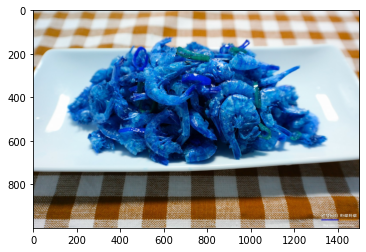

(1000, 1500, 3)


In [52]:
temp = cv2.imread(fullpath)
plt.imshow(temp)
plt.show()
print(temp.shape)

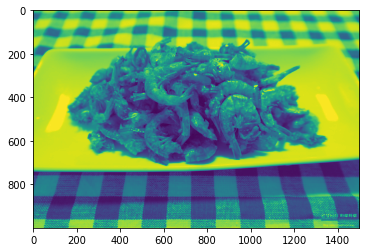

(1000, 1500)


In [51]:
currimg  = cv2.imread(fullpath,cv2.IMREAD_GRAYSCALE)
plt.imshow(currimg)
plt.show()
print(currimg.shape)

In [50]:
nclass     = len(paths)
valid_exts = [".jpg",".gif",".png",".tga", ".jpeg"]
imgcnt     = 0
for i, relpath in zip(range(nclass), paths):
    path = cwd + "/" + relpath
    flist = os.listdir(path)
    for f in flist:
        if os.path.splitext(f)[1].lower() not in valid_exts:
            continue
        fullpath = os.path.join(path, f)        
        ## open cv 이용
        currimg  = cv2.imread(fullpath,cv2.IMREAD_GRAYSCALE)
        currimg_small =  rescale(currimg, 0.25, anti_aliasing=False)
        currimgy_small_vec   = np.reshape(currimg_small, (1, -1))
        # Save 
        curr_label = np.eye(nclass, nclass)[i:i+1, :]
        if imgcnt is 0:
            totalimg   = currimgy_small_vec
            totallabel = curr_label
        else:
            totalimg   = np.concatenate((totalimg, currimgy_small_vec), axis=0)
            totallabel = np.concatenate((totallabel, curr_label), axis=0)
        imgcnt    = imgcnt + 1
print ("Total %d images loaded." % (imgcnt))

ValueError: ignored

In [42]:
temp = cv2.imread(currimg)
plt.imshow(temp)
plt.show()
print(temp.shape)

SystemError: ignored

In [ ]:
cv2_imshow(currimg)

DIVIDE TOTAL DATA INTO TRAINING AND TEST SET

In [ ]:
def print_shape(string, x):
    print ("Shape of '%s' is %s" % (string, x.shape,))
    
randidx    = np.random.randint(imgcnt, size=imgcnt)
trainidx   = randidx[0:int(3*imgcnt/5)]
testidx    = randidx[int(3*imgcnt/5):imgcnt]
trainimg   = totalimg[trainidx, :]
trainlabel = totallabel[trainidx, :]
testimg    = totalimg[testidx, :]
testlabel  = totallabel[testidx, :]
print_shape("trainimg", trainimg)
print_shape("trainlabel", trainlabel)
print_shape("testimg", testimg)
print_shape("testlabel", testlabel)

SAVE TO NPZ

In [ ]:
savepath = cwd + "/data/" + data_name + ".npz"
np.savez(savepath, trainimg=trainimg, trainlabel=trainlabel, testimg=testimg, testlabel=testlabel, imgsize=imgsize, use_gray=use_gray)
print ("Saved to %s" % (savepath))

LOAD TO CHECK!

In [ ]:
# Load them!
cwd = os.getcwd()
loadpath = cwd + "/data/" + data_name + ".npz"
l = np.load(loadpath,allow_pickle=True) ##allow_pickle = true 추가
1
# See what's in here
l.files

# Parse data
trainimg_loaded = l['trainimg']
trainlabel_loaded = l['trainlabel']
testimg_loaded = l['testimg']
testlabel_loaded = l['testlabel']

print ("%d train images loaded" % (trainimg_loaded.shape[0]))
print ("%d test images loaded" % (testimg_loaded.shape[0]))
print ("Loaded from to %s" % (savepath))

PLOT RANDOMLY SELECTED TRAIN IMAGES

In [ ]:
print(trainimg_loaded.shape)

In [ ]:
ntrain_loaded = trainimg_loaded.shape[0]
batch_size = 10;
randidx = np.random.randint(ntrain_loaded, size=batch_size)
for i in randidx: 
    currimg = np.reshape(trainimg_loaded[i, :], (imgsize[0], -1))
    currlabel_onehot = trainlabel_loaded[i, :]
    currlabel = np.argmax(currlabel_onehot) 
    if use_gray:
        currimg = np.reshape(trainimg[i, :], (imgsize[0], -1))
        plt.matshow(currimg, cmap=plt.get_cmap('gray'))
        plt.colorbar()
    else:
        currimg = np.reshape(trainimg[i, :], (imgsize[0], imgsize[1], 3))
        plt.imshow(currimg)
    title_string = "[%d] %d-class" % (i, currlabel)
    plt.title(title_string) 
    plt.show()

PLOT RANDOMLY SELECTED TEST IMAGES

In [ ]:
# Do batch stuff using loaded data 
ntest_loaded = testimg_loaded.shape[0]
batch_size   = 3;
randidx      = np.random.randint(ntest_loaded, size=batch_size)
for i in randidx: 
    currimg = np.reshape(testimg_loaded[i, :], (imgsize[0], -1))
    currlabel_onehot = testlabel_loaded[i, :]
    currlabel = np.argmax(currlabel_onehot) 
    
    if use_gray:
        currimg = np.reshape(testimg[i, :], (imgsize[0], -1))
        plt.matshow(currimg, cmap=plt.get_cmap('gray'))
        plt.colorbar()
    else:
        currimg = np.reshape(testimg[i, :], (imgsize[0], imgsize[1], 3))
        plt.imshow(currimg)
    title_string = "[%d] %d-class" % (i, currlabel)
    plt.title(title_string) 
    plt.show()

In [ ]:
# 애로 사항
# 1) 확보한 데이터 셋에 YOLO를 어떻게 적용할 수 있나?
# 2) 적용한다고 했을 때, 폴더명을 라벨 및 region 명으로 어떻게 활용할 수 있는가?
# 3) 현재 폴더구조로 구성된 데이터 셋을 바꿔야 하는 것인가?